In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as tsaplots
import statsmodels.formula.api as smf

from math import sqrt
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving CocaCola_Sales_Rawdata.xlsx to CocaCola_Sales_Rawdata.xlsx


In [3]:
cocacola=pd.read_excel('CocaCola_Sales_Rawdata.xlsx',parse_dates=True)
cocacola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [4]:
cocacola.dtypes

Quarter     object
Sales      float64
dtype: object

In [5]:
cocacola.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


<Axes: >

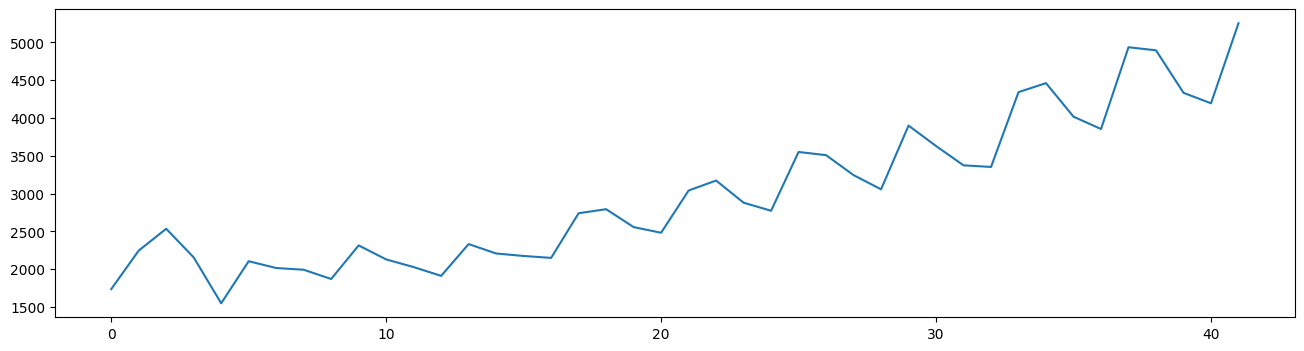

In [6]:
cocacola['Sales'].plot(figsize=(16,4))

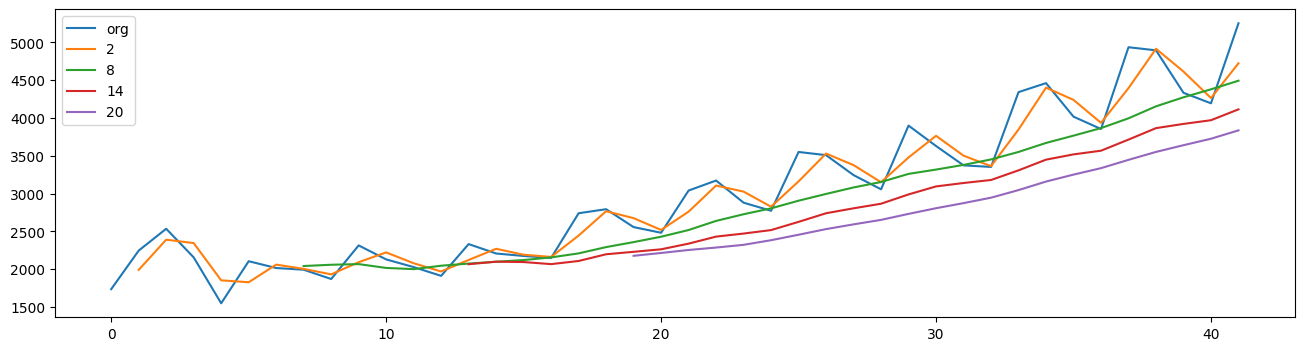

In [7]:
# Moving Average Smoothing
plt.figure(figsize=(16,4))
cocacola['Sales'].plot(label='org')
for i in range(2,24,6):     # 2 to 24 with step size = 6
    cocacola['Sales'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

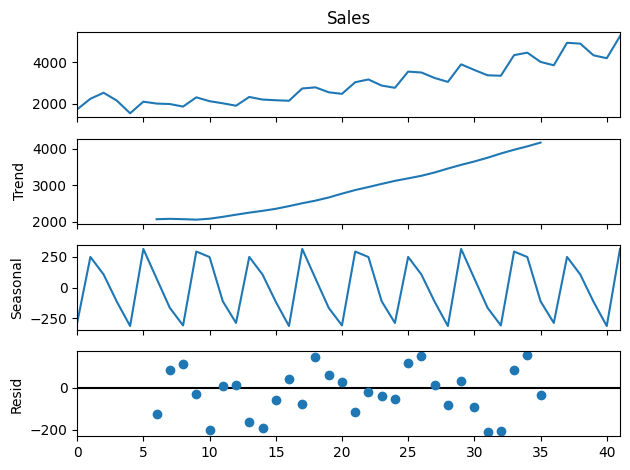

In [8]:
cocacola_decompose=seasonal_decompose(cocacola['Sales'],period=12)
cocacola_decompose.plot();

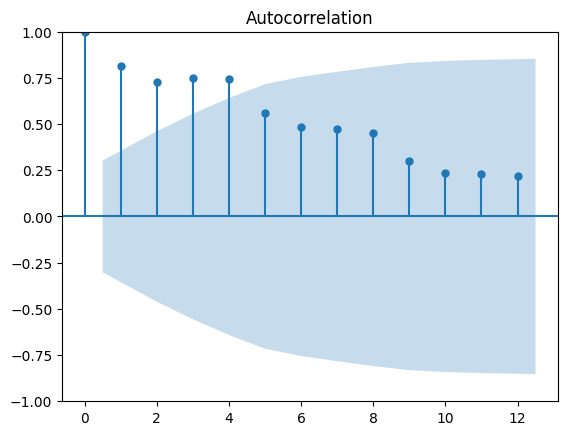

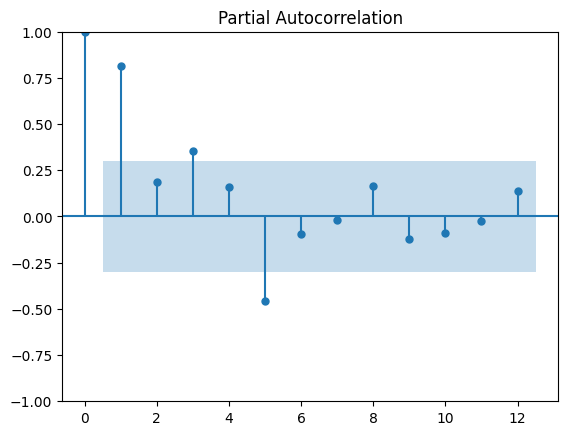

In [9]:
tsaplots.plot_acf(cocacola['Sales'],lags=12)
tsaplots.plot_pacf(cocacola['Sales'],lags=12);

## Model Based Forecasting

In [10]:
from datetime import datetime

In [11]:
cocacola1 = cocacola.copy()

In [12]:
cocacola1.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [13]:
split_data=cocacola1.Quarter.str.split('_', expand=True)
split_data.columns=['Q','year']

dt=list()

for val in (pd.to_datetime(split_data['year'], format='%y')):  # val is value of the item inside the sequence on each iteration
    st=(datetime.date(val).strftime('%Y'))
    dt.append(st)

dt=pd.Series(dt)

split_data['Quarter']=dt.str.cat(split_data['Q'],sep="-")  # cat is Concatenate strings in the Series/Index with given separator
split_data.drop(columns=['Q','year'])

cocacola1['Quarter']=split_data['Quarter']

cocacola1.head()

,Quarter,Sales
0,1986-Q1,1734.827000
1,1986-Q2,2244.960999
2,1986-Q3,2533.804993
3,1986-Q4,2154.962997
4,1987-Q1,1547.818996


In [14]:
cocacola1['Date']=pd.PeriodIndex(cocacola1['Quarter'].values, freq='Q').to_timestamp()
cocacola1.head()

,Quarter,Sales,Date
0,1986-Q1,1734.827000,1986-01-01
1,1986-Q2,2244.960999,1986-04-01
2,1986-Q3,2533.804993,1986-07-01
3,1986-Q4,2154.962997,1986-10-01
4,1987-Q1,1547.818996,1987-01-01


In [15]:
cocacola_sales=cocacola1.drop('Quarter', axis=1)
cocacola_sales=cocacola_sales[['Date','Sales']]
cocacola_sales

,Date,Sales
0,1986-01-01,1734.827000
1,1986-04-01,2244.960999
2,1986-07-01,2533.804993
3,1986-10-01,2154.962997
4,1987-01-01,1547.818996
5,1987-04-01,2104.411995
6,1987-07-01,2014.362999
7,1987-10-01,1991.746998
8,1988-01-01,1869.049999
9,1988-04-01,2313.631996


<Axes: >

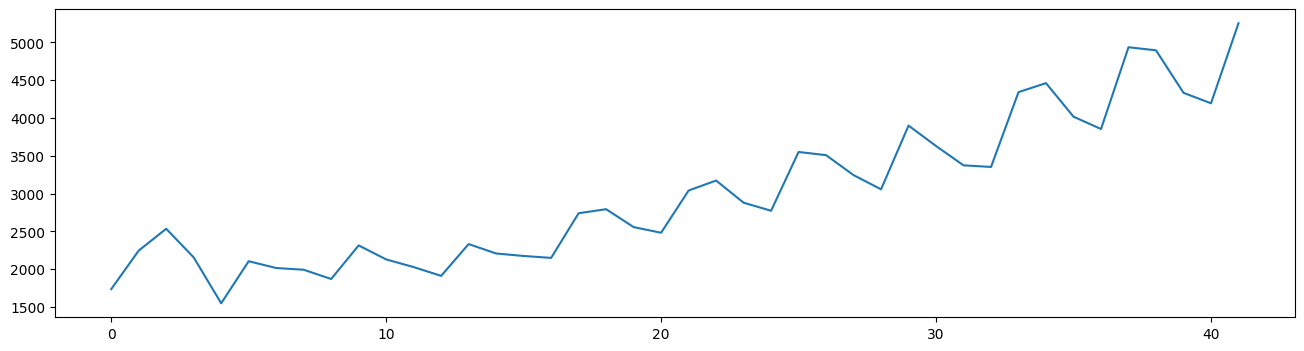

In [16]:
cocacola_sales['Sales'].plot(figsize=(16,4))

In [17]:
cocacola_sales['day']=cocacola_sales['Date'].dt.strftime('%d') # Day Extraction
cocacola_sales['weekday']=cocacola_sales['Date'].dt.strftime('%A') # Weekday (sunday, monday, tuesday...) Extraction
cocacola_sales['month']=cocacola_sales['Date'].dt.strftime('%b') # Month (Jan, Feb, Mar...) Extraction
cocacola_sales['year']=cocacola_sales['Date'].dt.strftime('%Y') # Year Extraction
cocacola_sales['quarter']=cocacola_sales['Date'].dt.strftime('%BQS') # Quarter Extraction

In [18]:
cocacola_sales

,Date,Sales,day,weekday,month,year,quarter
0,1986-01-01,1734.827000,01,Wednesday,Jan,1986,JanuaryQS
1,1986-04-01,2244.960999,01,Tuesday,Apr,1986,AprilQS
2,1986-07-01,2533.804993,01,Tuesday,Jul,1986,JulyQS
3,1986-10-01,2154.962997,01,Wednesday,Oct,1986,OctoberQS
4,1987-01-01,1547.818996,01,Thursday,Jan,1987,JanuaryQS
5,1987-04-01,2104.411995,01,Wednesday,Apr,1987,AprilQS
6,1987-07-01,2014.362999,01,Wednesday,Jul,1987,JulyQS
7,1987-10-01,1991.746998,01,Thursday,Oct,1987,OctoberQS
8,1988-01-01,1869.049999,01,Friday,Jan,1988,JanuaryQS
9,1988-04-01,2313.631996,01,Friday,Apr,1988,AprilQS


<Axes: xlabel='year', ylabel='Sales'>

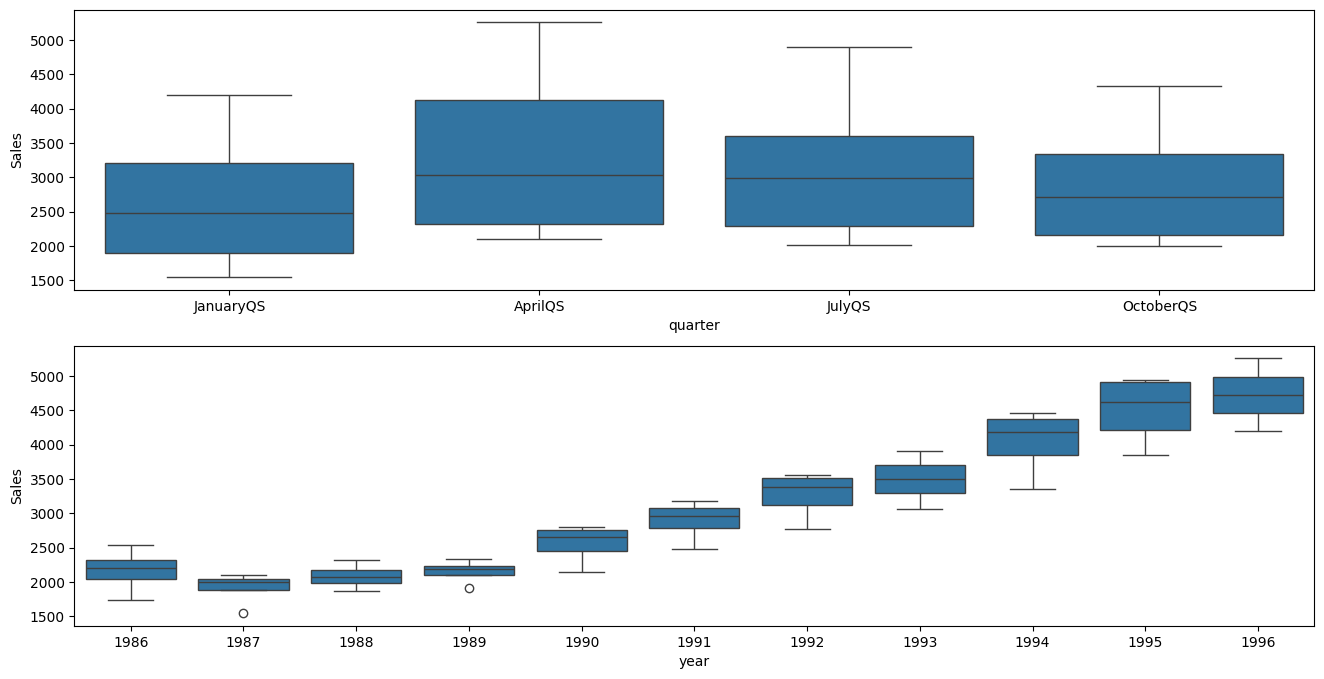

In [19]:
plt.figure(figsize=(16,8))
plt.subplot(211)
sns.boxplot(x='quarter',y='Sales',data=cocacola_sales)
plt.subplot(212)
sns.boxplot(x='year',y='Sales',data=cocacola_sales)

<Axes: xlabel='year', ylabel='Sales'>

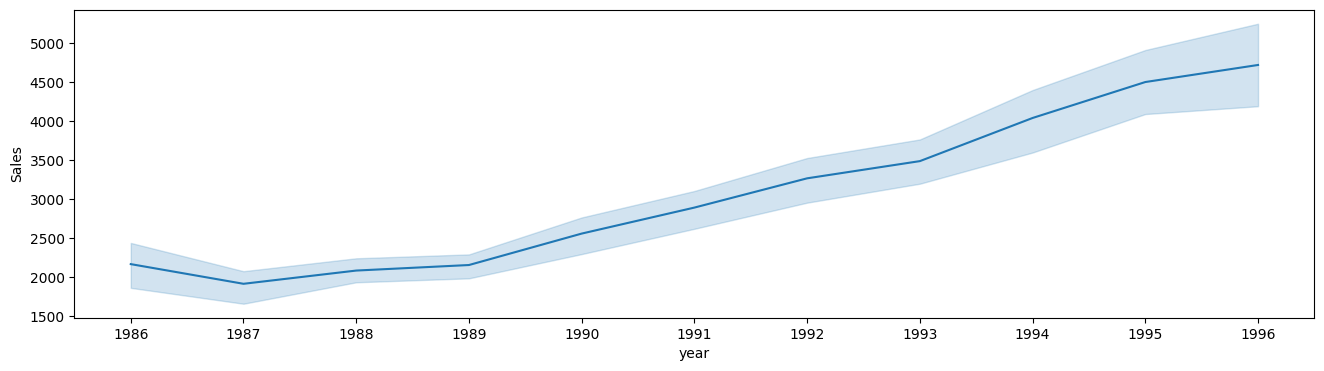

In [20]:
plt.figure(figsize=(16,4))
sns.lineplot(x='year',y='Sales',data=cocacola_sales)

### Data-PreProcessing

In [22]:
quarter_dummies=pd.DataFrame(pd.get_dummies(cocacola_sales['quarter']))
quarter_dummies.head()

,AprilQS,JanuaryQS,JulyQS,OctoberQS
0,0,1,0,0
1,1,0,0,0
2,0,0,1,0
3,0,0,0,1
4,0,1,0,0


In [23]:
# Adding it to the dataset
cocacola_sales1=pd.concat([cocacola_sales,quarter_dummies],axis=1)
cocacola_sales1.head()

,Date,Sales,day,weekday,month,year,quarter,AprilQS,JanuaryQS,JulyQS,OctoberQS
0,1986-01-01,1734.827000,01,Wednesday,Jan,1986,JanuaryQS,0,1,0,0
1,1986-04-01,2244.960999,01,Tuesday,Apr,1986,AprilQS,1,0,0,0
2,1986-07-01,2533.804993,01,Tuesday,Jul,1986,JulyQS,0,0,1,0
3,1986-10-01,2154.962997,01,Wednesday,Oct,1986,OctoberQS,0,0,0,1
4,1987-01-01,1547.818996,01,Thursday,Jan,1987,JanuaryQS,0,1,0,0


In [24]:
cocacola_sales1['t']=np.arange(1,43)
cocacola_sales1['t_squared']=cocacola_sales1['t']*cocacola_sales1['t']
cocacola_sales1['log_sales']=np.log(cocacola_sales1['Sales'])
cocacola_sales1.head()

,Date,Sales,day,weekday,month,year,quarter,AprilQS,JanuaryQS,JulyQS,OctoberQS,t,t_squared,log_sales
0,1986-01-01,1734.827000,01,Wednesday,Jan,1986,JanuaryQS,0,1,0,0,1,1,7.458663
1,1986-04-01,2244.960999,01,Tuesday,Apr,1986,AprilQS,1,0,0,0,2,4,7.716443
2,1986-07-01,2533.804993,01,Tuesday,Jul,1986,JulyQS,0,0,1,0,3,9,7.837477
3,1986-10-01,2154.962997,01,Wednesday,Oct,1986,OctoberQS,0,0,0,1,4,16,7.675529
4,1987-01-01,1547.818996,01,Thursday,Jan,1987,JanuaryQS,0,1,0,0,5,25,7.344602


### Splitting into train and test

In [25]:
train_size=int(len(cocacola_sales1)*0.50)
cocacola_sales1_train,cocacola_sales1_test=cocacola_sales1[0:train_size],cocacola_sales1[train_size:]

In [26]:
cocacola_sales1_test.head()

,Date,Sales,day,weekday,month,year,quarter,AprilQS,JanuaryQS,JulyQS,OctoberQS,t,t_squared,log_sales
21,1991-04-01,3039.522995,01,Monday,Apr,1991,AprilQS,1,0,0,0,22,484,8.019456
22,1991-07-01,3172.115997,01,Monday,Jul,1991,JulyQS,0,0,1,0,23,529,8.062154
23,1991-10-01,2879.000999,01,Tuesday,Oct,1991,OctoberQS,0,0,0,1,24,576,7.965199
24,1992-01-01,2772.000000,01,Wednesday,Jan,1992,JanuaryQS,0,1,0,0,25,625,7.927324
25,1992-04-01,3550.000000,01,Wednesday,Apr,1992,AprilQS,1,0,0,0,26,676,8.174703


### Model building on cocacola_sales1_train data

In [27]:
train=cocacola_sales1_train.head(14)
test=cocacola_sales1_train.tail(7)

In [29]:
#1 Linear Model
linear_model=smf.ols('Sales~t',data=train).fit()
pred_linear=linear_model.predict(test['t'])
rmse_linear=sqrt(mean_squared_error(test['Sales'],pred_linear))
rmse_linear

403.81849766773905

In [30]:
#2 Exponential Model
exp_model=smf.ols('log_sales~t',data=train).fit()
pred_exp=exp_model.predict(test['t'])
rmse_exp=sqrt(mean_squared_error(test['Sales'],np.exp(pred_exp)))  # as log was applied; apply exponential np.exp
rmse_exp

396.88148357498085

In [31]:
#3 Quadratic Model
quad_model=smf.ols('Sales~t+t_squared',data=train).fit()
pred_quad=quad_model.predict(test[['t','t_squared']])
rmse_quad=sqrt(mean_squared_error(test['Sales'],pred_quad))
rmse_quad

226.41889131556385

In [33]:
#4 Additive Seasonality Model
add_sea_model=smf.ols('Sales~JanuaryQS+AprilQS+JulyQS+OctoberQS',data=train).fit()
pred_add_sea=add_sea_model.predict(test[['JanuaryQS','AprilQS','JulyQS','OctoberQS']])
rmse_add_sea=sqrt(mean_squared_error(test['Sales'],pred_add_sea))
rmse_add_sea

460.2638938379731

In [34]:
#5 Additive Seasonality Quadratic Model
add_sea_quad_model=smf.ols('Sales~JanuaryQS+AprilQS+JulyQS+OctoberQS+t+t_squared',data=train).fit()
pred_add_sea_quad=add_sea_quad_model.predict(
    test[['JanuaryQS','AprilQS','JulyQS','OctoberQS','t','t_squared']])
rmse_add_sea_quad=sqrt(mean_squared_error(test['Sales'],pred_add_sea_quad))
rmse_add_sea_quad

125.20962396061455

In [35]:
#6 Multiplicative Seasonality Model
mul_sea_model=smf.ols('log_sales~JanuaryQS+AprilQS+JulyQS+OctoberQS',data=train).fit()
pred_mul_sea=mul_sea_model.predict(test[['JanuaryQS','AprilQS','JulyQS','OctoberQS']])
rmse_mul_sea=sqrt(mean_squared_error(test['Sales'],np.exp(pred_mul_sea)))  # as log was applied; apply exponential np.exp
rmse_mul_sea

464.62567180726217

In [36]:
#7 Multiplicative Additive Seasonality
mul_add_sea_model=smf.ols('log_sales~JanuaryQS+AprilQS+JulyQS+OctoberQS+t',data=train).fit()
pred_mul_add_sea=mul_add_sea_model.predict(test[['JanuaryQS','AprilQS','JulyQS','OctoberQS','t']])
rmse_mul_add_sea=sqrt(mean_squared_error(test['Sales'],np.exp(pred_mul_add_sea)))
rmse_mul_add_sea

426.1336142517407

In [37]:
data={'Model':pd.Series(
    ['rmse_linear','rmse_exp','rmse_quad','rmse_add_sea','rmse_add_sea_quad','rmse_mul_sea','rmse_mul_add_sea']),
     'RMSE_value':pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mul_sea,rmse_mul_add_sea])}
rmse_table=pd.DataFrame(data)
rmse_table.sort_values('RMSE_value')

,Model,RMSE_value
4,rmse_add_sea_quad,125.209624
2,rmse_quad,226.418891
1,rmse_exp,396.881484
0,rmse_linear,403.818498
6,rmse_mul_add_sea,426.133614
3,rmse_add_sea,460.263894
5,rmse_mul_sea,464.625672


### Final model

In [38]:
model_final=smf.ols('Sales~JanuaryQS+AprilQS+JulyQS+OctoberQS+t+t_squared',data=cocacola_sales1_train).fit()

### Predictions

In [39]:
pred_new=model_final.predict(cocacola_sales1_test)
pred_new

21    3076.777021
22    3166.228306
23    3112.761790
24    2996.720157
25    3634.323891
26    3757.438004
27    3737.634316
28    3655.255512
29    4326.522073
30    4483.299014
31    4497.158154
32    4448.442178
33    5153.371568
34    5343.811337
35    5391.333305
36    5376.280157
37    6114.872375
38    6338.974972
39    6420.159769
40    6438.769449
41    7211.024495
dtype: float64

In [40]:
cocacola_sales1_test['Sales_forecast']=pred_new
cocacola_sales1_test

,Date,Sales,day,weekday,month,year,quarter,AprilQS,JanuaryQS,JulyQS,OctoberQS,t,t_squared,log_sales,Sales_forecast
21,1991-04-01,3039.522995,01,Monday,Apr,1991,AprilQS,1,0,0,0,22,484,8.019456,3076.777021
22,1991-07-01,3172.115997,01,Monday,Jul,1991,JulyQS,0,0,1,0,23,529,8.062154,3166.228306
23,1991-10-01,2879.000999,01,Tuesday,Oct,1991,OctoberQS,0,0,0,1,24,576,7.965199,3112.761790
24,1992-01-01,2772.000000,01,Wednesday,Jan,1992,JanuaryQS,0,1,0,0,25,625,7.927324,2996.720157
25,1992-04-01,3550.000000,01,Wednesday,Apr,1992,AprilQS,1,0,0,0,26,676,8.174703,3634.323891
26,1992-07-01,3508.000000,01,Wednesday,Jul,1992,JulyQS,0,0,1,0,27,729,8.162801,3757.438004
27,1992-10-01,3243.859993,01,Thursday,Oct,1992,OctoberQS,0,0,0,1,28,784,8.084519,3737.634316
28,1993-01-01,3056.000000,01,Friday,Jan,1993,JanuaryQS,0,1,0,0,29,841,8.024862,3655.255512
29,1993-04-01,3899.000000,01,Thursday,Apr,1993,AprilQS,1,0,0,0,30,900,8.268475,4326.522073
30,1993-07-01,3629.000000,01,Thursday,Jul,1993,JulyQS,0,0,1,0,31,961,8.196712,4483.299014


### Forecast plot

<Axes: >

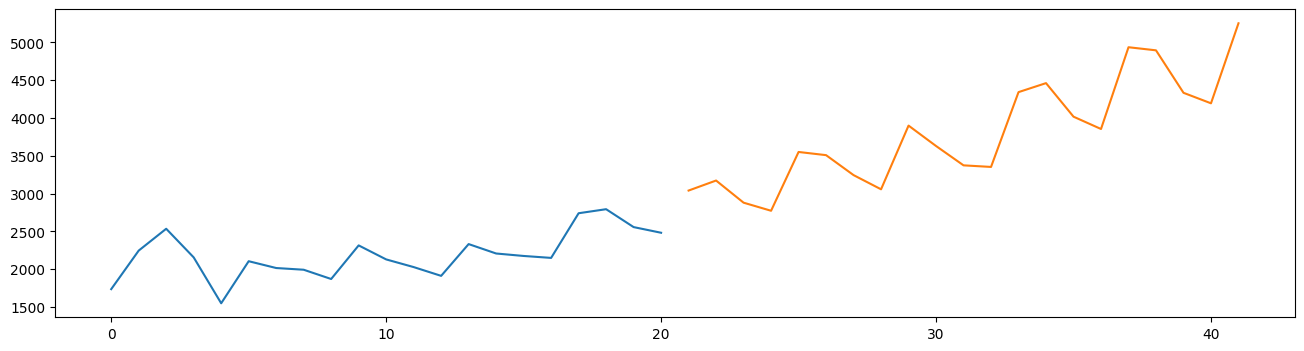

In [43]:
cocacola_sales1_train['Sales'].plot(figsize=(16,4))
cocacola_sales1_test['Sales'].plot()